In [1]:
from hwo_disra.api.notebook_api import DisraNBApi
from hwo_disra.Types import *

api = DisraNBApi()

def compute_yield(x, y):
  return x * y

yielder = api.yieldinator(name = 'test',
                          thresholds = {ScienceValue.ENABLING: 25},
                          variables = {'x': Range((0, 10)), 'y': Range((5, 15))},
                          yield_function = compute_yield)

yields = api.evaluate(yielder, steps = 5)

Warning, 5 of 20000 bins contained negative fluxes; they have been set to zero.
Warning, 3590 of 20000 bins contained negative fluxes; they have been set to zero.
Warning, 293 of 2920 bins contained negative fluxes; they have been set to zero.
Warning, 5 of 20000 bins contained negative fluxes; they have been set to zero.
Warning, 3590 of 20000 bins contained negative fluxes; they have been set to zero.
Warning, 293 of 2920 bins contained negative fluxes; they have been set to zero.


In [2]:

def compute_time(eac, yield_value, x, y) -> Time:
  return yield_value / eac.telescope.effective_aperture.value ** 2

timeinator = api.timeinator(yielder, compute_time)
results = api.evaluate(timeinator, register=True)

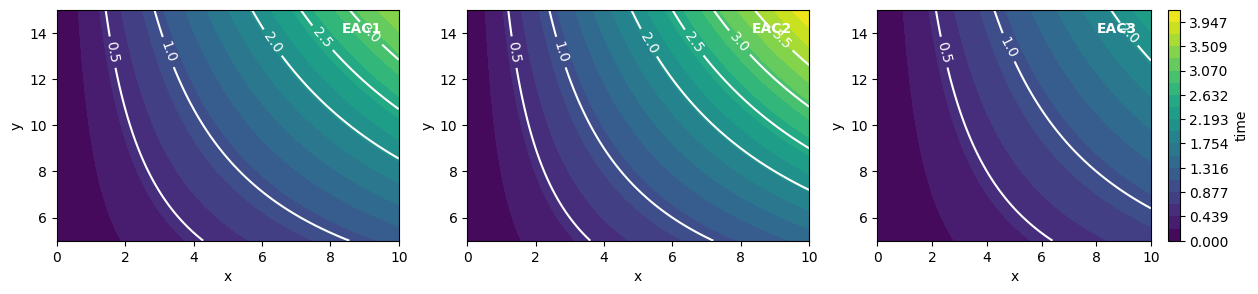

In [4]:
api.plotinator().contour_plot([e.sample_points for e in results], 'x', 'y', 'time',
                              titles=[e.eac for e in results],
                              contour_levels=[0.5, 1.0, 2.0, 2.5, 3.0, 3.5],
                              figsize=(15,3))